In [97]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.metrics import mean_squared_error, r2_score

# Data visualization and pre-processing

In [6]:
path_data = "./ECoG.npz"

with np.load(path_data) as EcoG_data:
    Xall = EcoG_data['Xall']
    Yall = EcoG_data['Yall']
    Fe = EcoG_data['Fe']

In [47]:
TrainSize = 1000

In [61]:
Xall.shape

(3327, 64)

In [62]:
Yall.shape

(3327, 1)

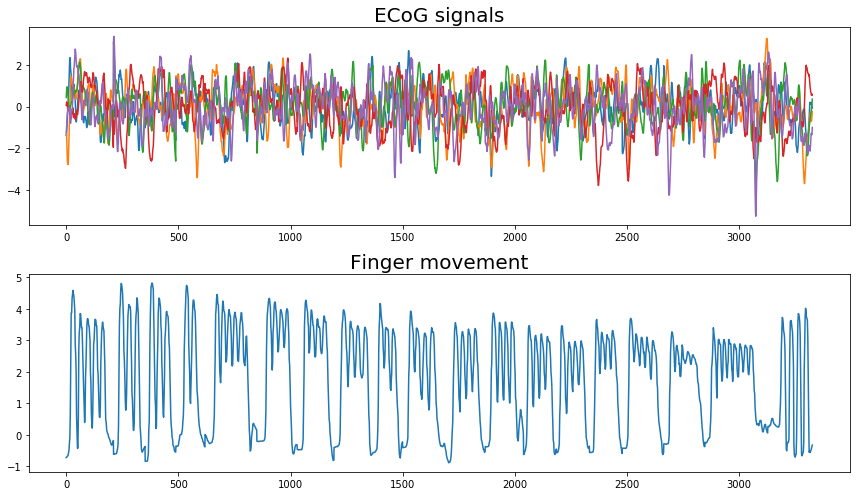

In [63]:
f = plt.figure(figsize=(12,7))

f.add_subplot(2, 1, 1)
plt.title("ECoG signals", size=20)
plt.plot(Xall[:,:5])

f.add_subplot(2, 1, 2)
plt.title("Finger movement", size=20)
plt.plot(Yall)

f.tight_layout()
plt.show()

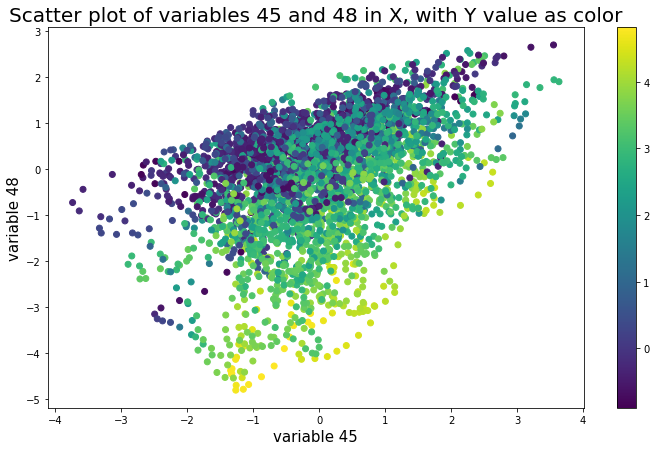

In [68]:
plt.figure(figsize=(12,7))
plt.scatter(x=Xall[:,45], y=Xall[:,48], c=Yall.reshape(-1,))
plt.xlabel("variable 45", size=15)
plt.ylabel("variable 48", size=15)
plt.title("Scatter plot of variables 45 and 48 in X, with Y value as color", size=20)
plt.colorbar()
plt.show()

## Split the data

In [55]:
XTrain = Xall[:TrainSize, ]
XTest = Xall[TrainSize:, ]

YTrain = Yall[:TrainSize]
YTest = Yall[TrainSize:]

# Least Squares regression (LS)

In [73]:
XTrain_ones = np.concatenate((XTrain, np.ones((TrainSize,1))), axis=1)

In [75]:
params = np.linalg.solve(a=XTrain_ones.T @ XTrain_ones, b=XTrain_ones.T @ YTrain)

w = params[:-1]
b = params[-1]

In [83]:
YTrain_pred = XTrain @ w + b
YTest_pred = XTest @ w + b

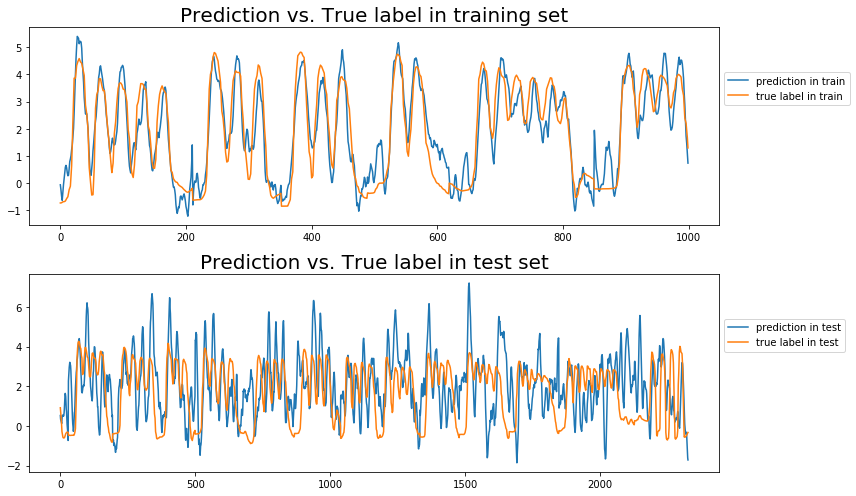

In [91]:
f = plt.figure(figsize=(12,7))

f.add_subplot(2, 1, 1)
plt.title("Prediction vs. True label in training set", size=20)
plt.plot(YTrain_pred, label='prediction in train')
plt.plot(YTrain, label='true label in train')
plt.legend(loc=0, bbox_to_anchor=(1, 0.8))

f.add_subplot(2, 1, 2)
plt.title("Prediction vs. True label in test set", size=20)
plt.plot(YTest_pred, label='prediction in test')
plt.plot(YTest, label='true label in test')
plt.legend(loc=0, bbox_to_anchor=(1, 0.8))

f.tight_layout()
plt.show()

In [101]:
mse_train = mean_squared_error(y_true=YTrain, y_pred=YTrain_pred)
r2_train = r2_score(y_true=YTrain, y_pred=YTrain_pred)

mse_test = mean_squared_error(y_true=YTest, y_pred=YTest_pred)
r2_test = r2_score(y_true=YTest, y_pred=YTest_pred)

print(f"For training set: MSE={mse_train}; R2={r2_train}")
print(f"For test set: MSE={mse_test}; R2={r2_test}")

For training set: MSE=0.5040654614476062; R2=0.8395001217500111
For test set: MSE=3.045536876760175; R2=-0.42817006302225846
